In [3]:
import tensorflow as tf
import aifc
import os
import numpy as np

from matplotlib import mlab
from os import listdir
from os.path import isfile, join
import csv
import pandas as pd
# import tensorflow as tf

from sklearn.model_selection import train_test_split

In [4]:
def ReadAIFF(file):
    s = aifc.open(file,'r')
    nFrames = s.getnframes()
    strSig = s.readframes(nFrames)
    return np.fromstring(strSig, np.short).byteswap()


def get_labels(labels_path):
    labels = dict()
    with open(labels_path, 'r') as f:
        reader = csv.reader(f, dialect='excel')
        for row in reader:
            labels[row[0]] = row[1]
    return labels

def get_spects(onlyfiles, labels):
    sps = []
    y = []
    for file_path in onlyfiles:
        s = ReadAIFF(file_path)
        y.append(labels[file_path.split("\\")[-1]])
        params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
        P, freqs, bins = mlab.specgram(s, **params)
        sps.append(P)
    return np.array(sps), np.array(y)


In [3]:
# labels_path = "C:\\Users\\jorge\\DatasetsTFM\\KaggleData\\train.csv"
# train_path = "C:\\Users\\jorge\\DatasetsTFM\\KaggleData\\train"

labels_path = "data/train.csv"
train_path = "data/train"

train_redux_path = "data/train2"

labels_dict = get_labels(labels_path)

In [4]:
audiofiles = [os.path.join(train_path, f) for f in listdir(train_path) if isfile(join(train_path, f))]
audiofiles_redux = [os.path.join(train_redux_path, f) 
                    for f in listdir(train_redux_path) if isfile(join(train_redux_path, f))]
audiofiles[0:5], audiofiles_redux

(['data/train/train20364.aiff',
  'data/train/train254.aiff',
  'data/train/train9357.aiff',
  'data/train/train1195.aiff',
  'data/train/train2978.aiff'],
 ['data/train2/20090331_193000_70490s0ms_TRAIN44644_0.aif',
  'data/train2/20090328_001500_1466s7ms_TRAIN231_0.aif',
  'data/train2/20090328_081500_30319s4ms_TRAIN2735_0.aif',
  'data/train2/20090330_101500_37337s6ms_TRAIN26634_0.aif',
  'data/train2/20090330_163000_59529s3ms_TRAIN28856_1.aif',
  'data/train2/20090329_150000_54876s7ms_TRAIN16385_0.aif',
  'data/train2/20090331_051500_19794s7ms_TRAIN37252_0.aif',
  'data/train2/20090331_070000_25611s5ms_TRAIN38034_0.aif',
  'data/train2/20090331_183000_66807s6ms_TRAIN44110_0.aif',
  'data/train2/20090329_154500_56758s9ms_TRAIN16962_1.aif',
  'data/train2/20090331_111500_41120s8ms_TRAIN40575_0.aif',
  'data/train2/20090330_190000_69174s1ms_TRAIN29999_0.aif',
  'data/train2/20090328_103000_38509s5ms_TRAIN3608_1.aif',
  'data/train2/20090328_220000_79993s6ms_TRAIN7197_0.aif',
  'data/tr

In [10]:
df_labels = pd.read_csv(labels_path)
df_labels['label'].value_counts()

0    22973
1     7027
Name: label, dtype: int64

In [11]:
df_labels['label'].value_counts(normalize=True)

0    0.765767
1    0.234233
Name: label, dtype: float64

In [5]:
f = aifc.open(audiofiles[0])
print(f.getframerate())
f.close()

2000


In [8]:

s = ReadAIFF(audiofiles[0])

params = {'NFFT':256, 'Fs':2000, 'noverlap':192}

P, freqs, bins = mlab.specgram(s, **params)

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


In [9]:
P.shape

(129, 59)

In [11]:
labels_dict

{'clip_name': 'label',
 'train1.aiff': '0',
 'train2.aiff': '0',
 'train3.aiff': '0',
 'train4.aiff': '0',
 'train5.aiff': '0',
 'train6.aiff': '1',
 'train7.aiff': '1',
 'train8.aiff': '0',
 'train9.aiff': '1',
 'train10.aiff': '0',
 'train11.aiff': '0',
 'train12.aiff': '1',
 'train13.aiff': '0',
 'train14.aiff': '0',
 'train15.aiff': '0',
 'train16.aiff': '0',
 'train17.aiff': '0',
 'train18.aiff': '0',
 'train19.aiff': '0',
 'train20.aiff': '0',
 'train21.aiff': '0',
 'train22.aiff': '0',
 'train23.aiff': '0',
 'train24.aiff': '0',
 'train25.aiff': '0',
 'train26.aiff': '0',
 'train27.aiff': '0',
 'train28.aiff': '1',
 'train29.aiff': '0',
 'train30.aiff': '0',
 'train31.aiff': '1',
 'train32.aiff': '1',
 'train33.aiff': '0',
 'train34.aiff': '0',
 'train35.aiff': '0',
 'train36.aiff': '0',
 'train37.aiff': '0',
 'train38.aiff': '0',
 'train39.aiff': '0',
 'train40.aiff': '0',
 'train41.aiff': '0',
 'train42.aiff': '0',
 'train43.aiff': '0',
 'train44.aiff': '0',
 'train45.aiff': '

In [13]:
audiofiles[0].split("/")[-1]

'train20364.aiff'

In [14]:
p = 0.7
s[:int(s.shape[0] * p)].shape, s[int(s.shape[0] * (1-p)/2): int(s.shape[0] * (1+p)/2)].shape, s[int(s.shape[0] * (1-p)):].shape

((2800,), (2800,), (2800,))

In [15]:
vfunc = np.vectorize(lambda x: labels_dict[x.split('\\')[-1]])

In [24]:
(vfunc(audiofiles) == '0').sum(), (vfunc(audiofiles) == '1').sum()

(22973, 7027)

In [26]:
X = np.array(audiofiles)
Y = vfunc(audiofiles)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
X_train.shape, X_test.shape, (Y_train=='1').sum(), (Y_train=='0').sum()

((21000,), (9000,), 4931, 16069)

In [30]:

X, Y = get_spects(X_test, labels_dict)
X.shape, Y.shape

c:\users\jorge\pycharmprojects\audioextraction\tfenv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


((9000, 129, 59), (9000,))

In [33]:
'Tamaño en memoria de los datos aprox: %.2fGB' % (a.nbytes/2**10/2**10/2**10)

'Tamaño en memoria de los datos aprox: 1.70GB'

In [147]:
def get_spects_enhanced(onlyfiles, labels, p=0.7, cut= True):
    if cut:
        top_hz = 40
    sps = []
    y = []
    for file_path in onlyfiles:
        s = ReadAIFF(file_path)
        this_label = int(labels[file_path.split("\\")[-1]])
        s1 = s[:int(s.shape[0] * p)]
        y.append(this_label)
        s2 = s[int(s.shape[0] * (1-p)/2): int(s.shape[0] * (1+p)/2)]
        y.append(this_label)
        s3 = s[int(s.shape[0] * (1-p)):]
        y.append(this_label)
        params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
        P1, freqs, bins = mlab.specgram(s1, **params)
        sps.append(P1[:top_hz,:])
        P2, freqs, bins = mlab.specgram(s2, **params)
        sps.append(P2[:top_hz,:])
        P3, freqs, bins = mlab.specgram(s3, **params)
        sps.append(P3[:top_hz,:])
    return np.array(sps), np.array(y)


X, Y = get_spects_enhanced(audiofiles, labels_dict)
X.shape, Y.shape

c:\users\jorge\pycharmprojects\audioextraction\tfenv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


((90000, 40, 40), (90000,))

In [191]:
(Y=='1').sum(), (Y=='0').sum()

(21081, 68919)

In [179]:
def enhance_with_noise(X, Y, noise_p=0.28):
    whale_index, = np.where(Y == '1')
    no_whale_index, = np.where(Y == '0')
    X_enhanced = []
    Y_enhanced = []
    for s_i in whale_index:
        new_X = X[s_i] + noise_p*X[np.random.choice(no_whale_index)]
        X_enhanced.append(new_X)
        Y_enhanced.append(1)
    return np.array(X_enhanced),  np.array(Y_enhanced)

X_enhanced, Y_enhanced = enhance_with_noise(X, Y)
X_enhanced.shape, Y_enhanced.shape

((21081, 40, 40), (21081,))

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
X_train, Y_train = np.concatenate([X_train, X_enhanced]), np.concatenate([Y_train, Y_enhanced])
X_train.shape, X_test.shape, (Y_train=='1').sum(), (Y_train=='0').sum()

((84081, 40, 40), (27000, 40, 40), 35996, 48085)

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


In [213]:
Y_train, Y_test = Y_train.astype(int), Y_test.astype(int)
Y_train, Y_test = tf.keras.utils.to_categorical(Y_train, 2), tf.keras.utils.to_categorical(Y_test, 2) 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(20, kernel_size=(7, 7), activation=tf.nn.relu, input_shape=X_train.shape[1:], name='Conv1'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(40, kernel_size=(7, 7), activation=tf.nn.relu, name='Conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, name="Dense1"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax, name="Softmax")
    ])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5, verbose=1)
model.evaluate(X_test, Y_test)

Epoch 1/5
84081/84081 [==============================] - 193s 2ms/sample - loss: 6.8600 - acc: 0.5719
Epoch 2/5
84081/84081 [==============================] - 195s 2ms/sample - loss: 6.8602 - acc: 0.5719
Epoch 3/5
84081/84081 [==============================] - 208s 2ms/sample - loss: 7.0057 - acc: 0.5621
Epoch 4/5
84081/84081 [==============================] - 217s 3ms/sample - loss: 6.8374 - acc: 0.5729
Epoch 5/5
27000/27000 [==============================] - 20s 753us/sample - loss: 3.6606 - acc: 0.7716


[3.660609540515476, 0.77155554]

# Spectrograms redux

In [5]:
# python basic pacakages
import aifc
import os
import datetime
import sys
from os import listdir
from os.path import isfile, join
import csv

# required packags
import librosa
import numpy as np
import pandas as pd

from matplotlib import mlab
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# my packages
from DataManager.Audio import *
from DataManager.General import *



In [7]:
labels_path = "data/train.csv"
train_path = "data/train"
train_redux_path = "data/train2/"

audiofiles = [os.path.join(train_path, f) for f in listdir(train_path) if isfile(join(train_path, f))]
labels_dict = get_labels(labels_path)

In [8]:
n = 5
s = aifc.open(audiofiles[n], 'r')
framerate = s.getframerate()
nframes = s.getnframes()
strsig = s.readframes(nframes)
data = np.fromstring(strsig, np.short).byteswap()
labels_dict[audiofiles[n].split('/')[-1]], data[:30]

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


('0', array([  4,  -2,  -2,  -1, -10,  -5,  -6,  -5,   0,  -7,   0,  15,  -7,
          0,  10, -13, -14,   8,   7,   1,  12, -19, -19,  22,  -4,  -7,
         36, -33, -36,  22], dtype=int16))

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


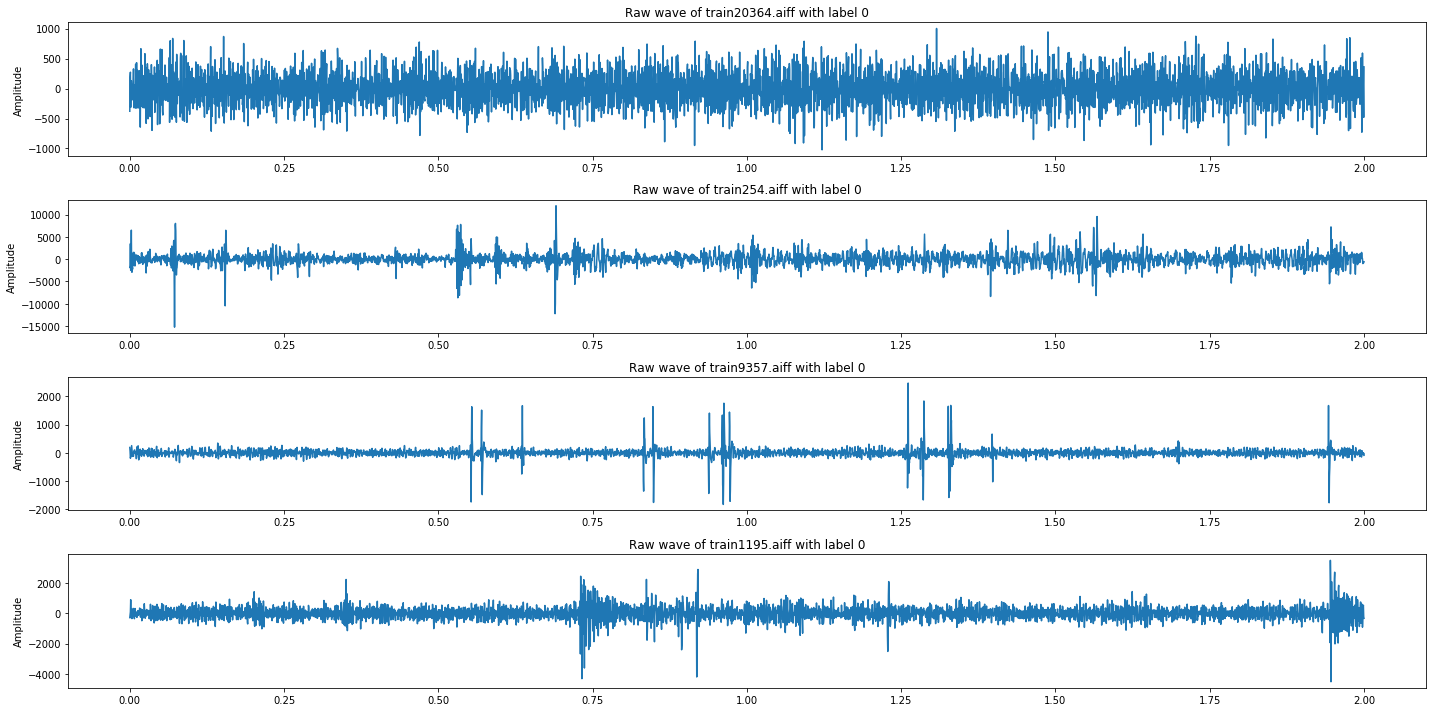

In [9]:
fig = plt.figure(figsize=(20, 10))

n=4

for i, fn in enumerate(audiofiles[:n]):
    s = aifc.open(fn, 'r')
    
    framerate = s.getframerate()
    nframes = s.getnframes()
    strsig = s.readframes(nframes)
    data = np.fromstring(strsig, np.short).byteswap()
    
    ax = fig.add_subplot(n, 1, i+1)
    ax.set_title('Raw wave of ' + fn.split('/')[-1] + ' with label %s' % labels_dict[fn.split('/')[-1]])
    ax.set_ylabel('Amplitude')
    ax.plot(np.linspace(0, nframes/framerate, nframes), data)
fig.tight_layout()
plt.savefig('wave_example.png')

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


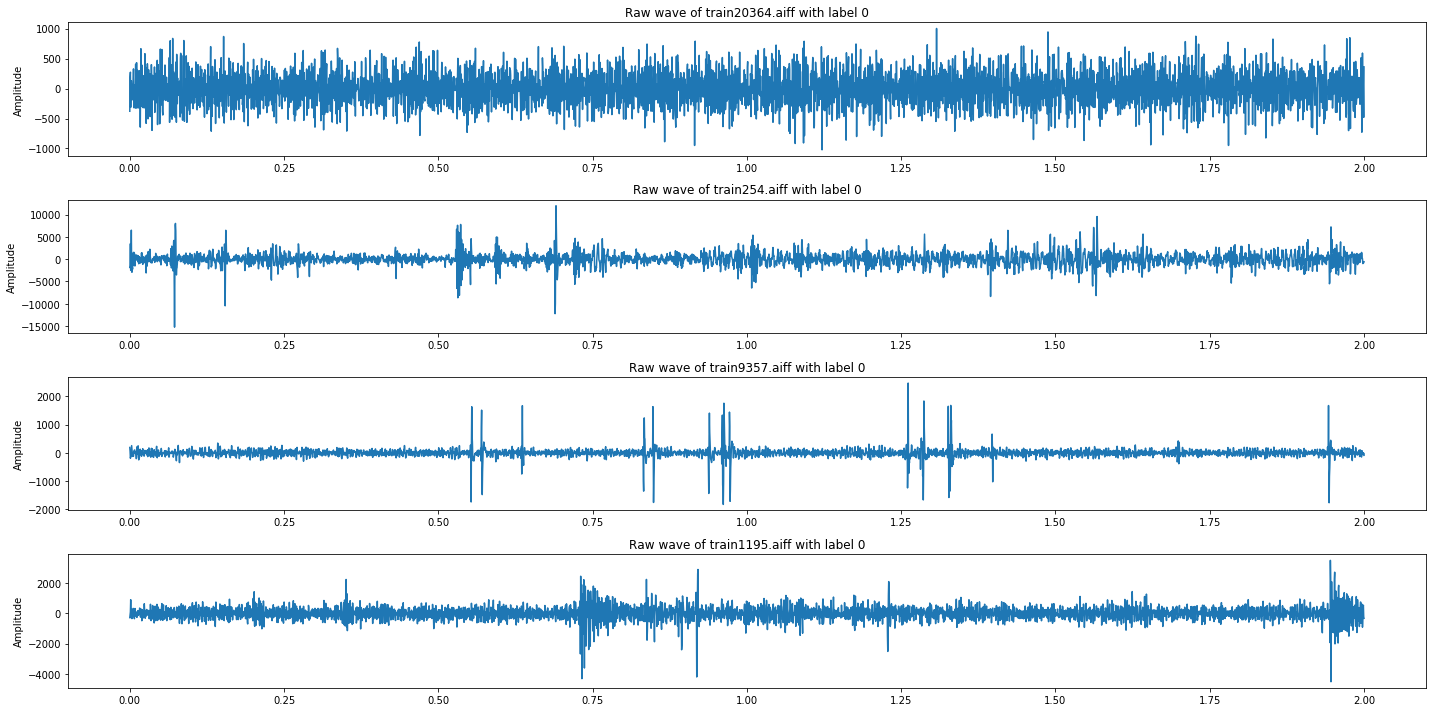

In [10]:
fig = plt.figure(figsize=(20, 10))

n=4

for i, fn in enumerate(audiofiles[:n]):
    s = aifc.open(fn, 'r')
    
    framerate = s.getframerate()
    nframes = s.getnframes()
    strsig = s.readframes(nframes)
    data = np.fromstring(strsig, np.short).byteswap()
    
    ax = fig.add_subplot(n, 1, i+1)
    ax.set_title('Raw wave of ' + fn.split('/')[-1] + ' with label %s' % labels_dict[fn.split('/')[-1]])
    ax.set_ylabel('Amplitude')
    params = {'NFFT': 256, 'Fs': 2000, 'noverlap': 192}
    P, freqs, bins = mlab.specgram(data, **params)
    ax.plot(np.linspace(0, nframes/framerate, nframes), data)
#     plt.show(P)
fig.tight_layout()
plt.savefig('spectrogram_example.png')

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


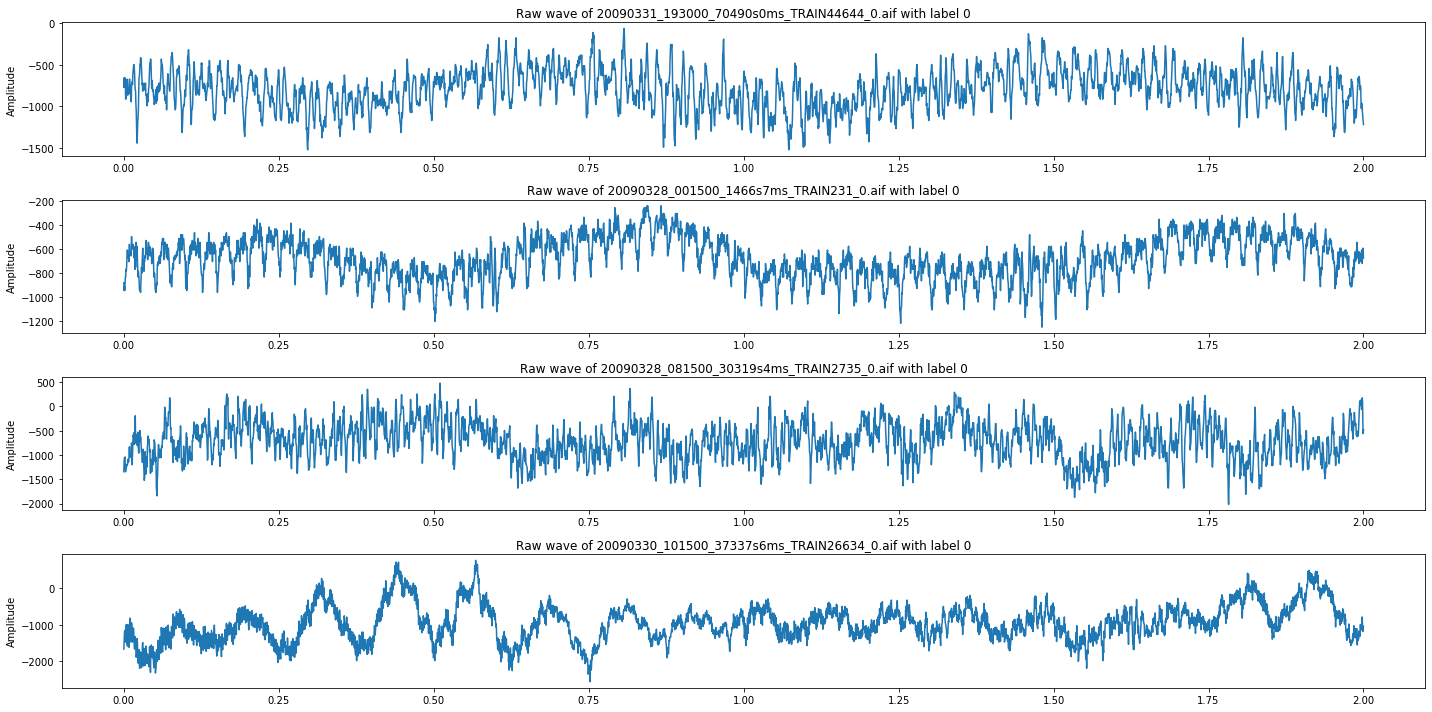

In [11]:
fig = plt.figure(figsize=(20, 10))

n=4

for i, fn in enumerate(audiofiles_redux[:n]):
    s = aifc.open(fn, 'r')
    
    framerate = s.getframerate()
    nframes = s.getnframes()
    strsig = s.readframes(nframes)
    data = np.fromstring(strsig, np.short).byteswap()
    
    ax = fig.add_subplot(n, 1, i+1)
    ax.set_title('Raw wave of ' + fn.split('/')[-1] + ' with label %s' % fn[-5])
    ax.set_ylabel('Amplitude')
    ax.plot(np.linspace(0, nframes/framerate, nframes), data)
fig.tight_layout()
plt.savefig('wave_redux_example.png')

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


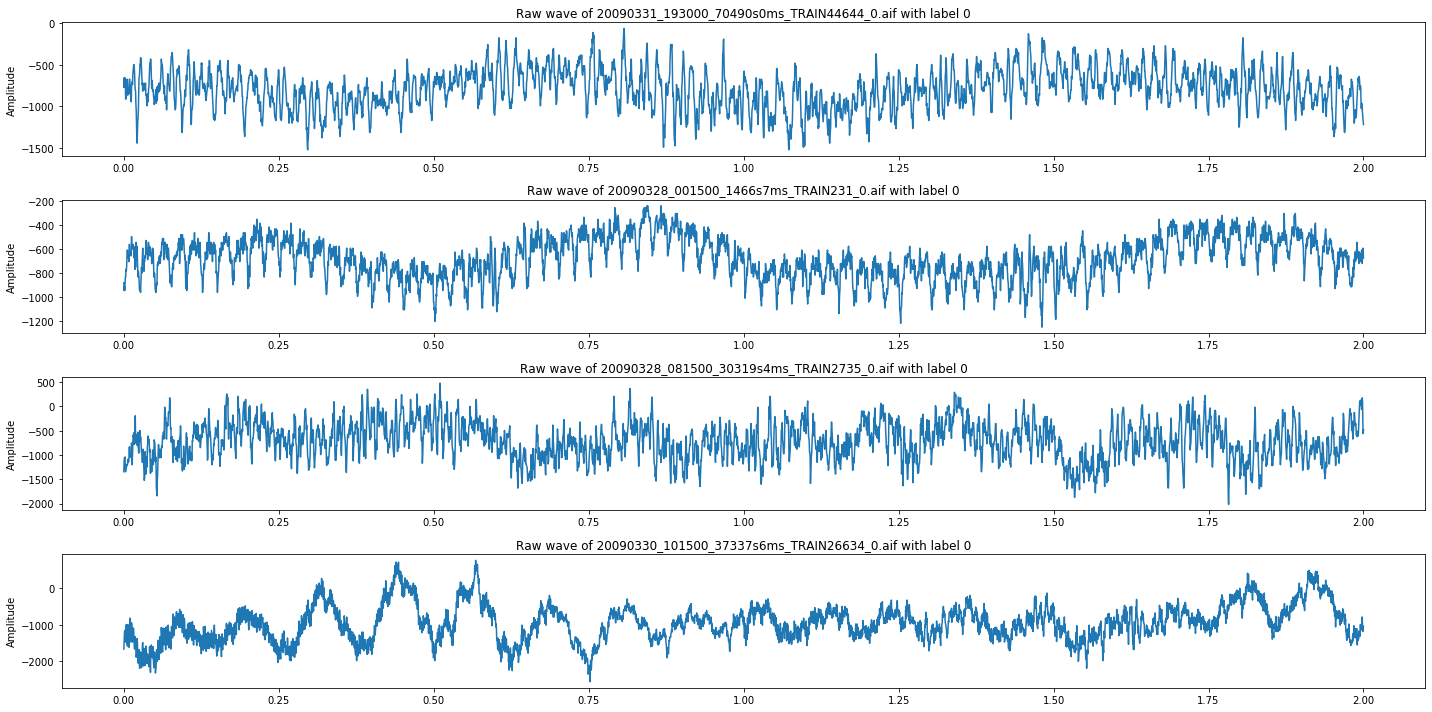

In [12]:
fig = plt.figure(figsize=(20, 10))

n=4

for i, fn in enumerate(audiofiles_redux[:n]):
    s = aifc.open(fn, 'r')
    
    framerate = s.getframerate()
    nframes = s.getnframes()
    strsig = s.readframes(nframes)
    data = np.fromstring(strsig, np.short).byteswap()
    
    ax = fig.add_subplot(n, 1, i+1)
    ax.set_title('Raw wave of ' + fn.split('/')[-1] + ' with label %s' % fn[-5])
    ax.set_ylabel('Amplitude')
    ax.plot(np.linspace(0, nframes/framerate, nframes), data)
    s.close()
fig.tight_layout()
plt.savefig('wave_example.png')

In [13]:
list(map(lambda x: x.split('/')[-1], audiofiles_redux))

['20090331_193000_70490s0ms_TRAIN44644_0.aif',
 '20090328_001500_1466s7ms_TRAIN231_0.aif',
 '20090328_081500_30319s4ms_TRAIN2735_0.aif',
 '20090330_101500_37337s6ms_TRAIN26634_0.aif',
 '20090330_163000_59529s3ms_TRAIN28856_1.aif',
 '20090329_150000_54876s7ms_TRAIN16385_0.aif',
 '20090331_051500_19794s7ms_TRAIN37252_0.aif',
 '20090331_070000_25611s5ms_TRAIN38034_0.aif',
 '20090331_183000_66807s6ms_TRAIN44110_0.aif',
 '20090329_154500_56758s9ms_TRAIN16962_1.aif',
 '20090331_111500_41120s8ms_TRAIN40575_0.aif',
 '20090330_190000_69174s1ms_TRAIN29999_0.aif',
 '20090328_103000_38509s5ms_TRAIN3608_1.aif',
 '20090328_220000_79993s6ms_TRAIN7197_0.aif',
 '20090328_014500_6323s8ms_TRAIN862_0.aif',
 '20090331_033000_12699s6ms_TRAIN36543_0.aif',
 '20090329_113000_41432s9ms_TRAIN14275_0.aif',
 '20090329_194500_71862s7ms_TRAIN20732_0.aif',
 '20090328_234500_85965s7ms_TRAIN8337_0.aif',
 '20090329_004500_3524s4ms_TRAIN8938_0.aif',
 '20090329_013000_5796s0ms_TRAIN9446_0.aif',
 '20090331_110000_39990s3ms

In [14]:
def read_aiff_detailed(file):
    s = aifc.open(file, 'r')
    framerate = s.getframerate()
    nframes = s.getnframes()
    strsig = s.readframes(nframes)
    data = np.fromstring(strsig, np.short).byteswap()
    # corrected_data = fill_array(data)
    s.close()
    return [data.shape, framerate, nframes]


train_redux_path = "data/train2/"

reduxfiles = [os.path.join(train_redux_path, f) 
              for f in listdir(train_redux_path) if isfile(join(train_redux_path, f))]

no_std_files = [[i,
                 i.split('/')[-1][-5],
                 *read_aiff_detailed(i)]
                for i in reduxfiles]

df_non_std = pd.DataFrame(no_std_files, columns=['file', 'label', 'audio_samples', 'framerate', 'nframes'])

display(df_non_std['label'].value_counts())
display(df_non_std[df_non_std['audio_samples'] != 4000]['label'].value_counts().head())
display(df_non_std[df_non_std['audio_samples'] != 4000]['framerate'].value_counts().head())
display(df_non_std[df_non_std['audio_samples'] != 4000]['nframes'].value_counts().head())


/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


0    42565
1     5276
Name: label, dtype: int64

0    42565
1     5276
Name: label, dtype: int64

2000    47841
Name: framerate, dtype: int64

4000    42304
2970       39
3000       37
2940       34
2869       34
Name: nframes, dtype: int64

In [15]:
df_non_std

,file,label,audio_samples,framerate,nframes
0,data/train2/20090331_193000_70490s0ms_TRAIN446...,0,"(4000,)",2000,4000
1,data/train2/20090328_001500_1466s7ms_TRAIN231_...,0,"(4000,)",2000,4000
2,data/train2/20090328_081500_30319s4ms_TRAIN273...,0,"(4000,)",2000,4000
3,data/train2/20090330_101500_37337s6ms_TRAIN266...,0,"(4000,)",2000,4000
4,data/train2/20090330_163000_59529s3ms_TRAIN288...,1,"(4000,)",2000,4000
5,data/train2/20090329_150000_54876s7ms_TRAIN163...,0,"(3729,)",2000,3729
6,data/train2/20090331_051500_19794s7ms_TRAIN372...,0,"(3940,)",2000,3940
7,data/train2/20090331_070000_25611s5ms_TRAIN380...,0,"(4000,)",2000,4000
8,data/train2/20090331_183000_66807s6ms_TRAIN441...,0,"(4000,)",2000,4000
9,data/train2/20090329_154500_56758s9ms_TRAIN169...,1,"(4000,)",2000,4000


In [16]:
df_non_std['label'].apply(int).sum() / len(df_non_std)*100

11.028197571121005

In [17]:
len(df_non_std)

47841

In [18]:
colunms = ['label', 'audio_samples', 'framerate', 'nframes']

df_non_std.groupby(['label'])[colunms[3]].value_counts().nlargest(50)

label  nframes
0      4000       37269
1      4000        5035
0      2970          39
       3000          37
       2869          34
       2940          34
       3019          32
       3029          32
       2779          31
       3250          31
       3290          31
       3069          30
       2880          29
       2919          28
       3110          28
       3190          27
       2980          26
       3149          26
       3779          26
       2750          25
       2840          25
       2889          25
       3059          25
       3279          25
       3720          25
       3750          25
       3880          25
       3940          25
       2820          24
       2839          24
       2989          24
       3100          24
       2860          23
       3089          23
       3470          23
       3500          23
       2720          22
       2770          22
       2790          22
       2850          22
       2899          22
 

In [19]:
df_non_std[(df_non_std['label'] == '1') & (df_non_std['nframes'] == 4000)].shape[0] / df_non_std[(df_non_std['nframes'] == 4000)].shape[0] * 100


11.90194780635401

56 data/train2/20090329_164500_60791s0ms_TRAIN18027_1.aif


/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


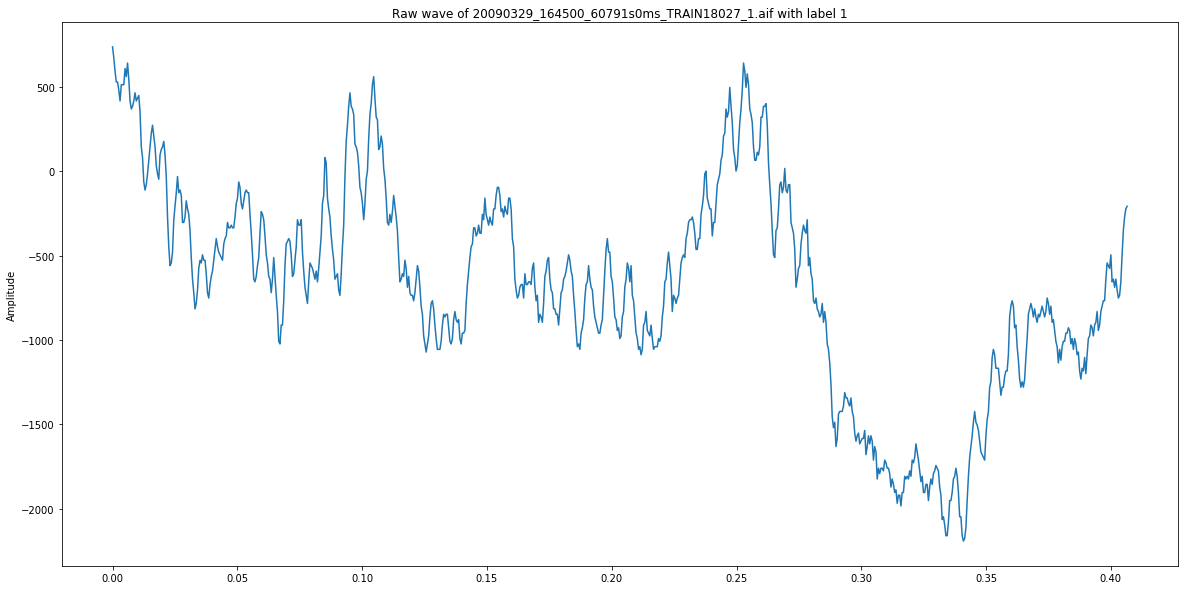

In [25]:
rn = np.random.randint(0, len(df_non_std[(df_non_std['label'] == '1') & (df_non_std['nframes'] != 4000)]))

fn = df_non_std[(df_non_std['label'] == '1') & (df_non_std['nframes'] != 4000)]['file'].iloc[rn]

print(rn, fn)

s = aifc.open(fn, 'r')
    
framerate = s.getframerate()
nframes = s.getnframes()
strsig = s.readframes(nframes)
data = np.fromstring(strsig, np.short).byteswap()
s.close()    

plt.figure(figsize=(20, 10))
plt.title('Raw wave of ' + fn.split('/')[-1] + ' with label %s' % fn[-5])
plt.ylabel('Amplitude')
plt.plot(np.linspace(0, nframes/framerate, nframes), data)


In [21]:
data

array([-1296, -1296, -1088, ..., -1200,  -992,  -976], dtype=int16)

In [22]:
s = aifc.open(fn, 'r')
    
framerate = s.getframerate()
nframes = s.getnframes()
strsig = s.readframes(nframes)
data = np.fromstring(strsig, np.short).byteswap()

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [23]:
data


array([-1296, -1296, -1088, ..., -1200,  -992,  -976], dtype=int16)

In [24]:
np.fromstring(strsig, np.short).byteswap()

/home/jorge/PycharmProjects/AudioExtraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


array([-1296, -1296, -1088, ..., -1200,  -992,  -976], dtype=int16)

# Working with the past network

In [6]:
results_folder = '/home/jorge/Documents/DatasetsTFM/ProjectTrials/results'
results_folder_2 = '/home/jorge/Documents/results.original'

In [47]:

resultsfiles = [os.path.join(results_folder, f) 
              for f in listdir(results_folder) if isfile(join(results_folder, f))]

resultsfiles_2 = [os.path.join(results_folder_2, f) 
              for f in listdir(results_folder_2) if isfile(join(results_folder_2, f))]

resultsfiles[:5]

['/home/jorge/Documents/DatasetsTFM/ProjectTrials/results/low32model_loss0.975666642189.pdf',
 '/home/jorge/Documents/DatasetsTFM/ProjectTrials/results/nn_winner_128_dropout0.233333333333.json',
 '/home/jorge/Documents/DatasetsTFM/ProjectTrials/results/low32Dropoutmodel_loss0.998333334923.pdf',
 '/home/jorge/Documents/DatasetsTFM/ProjectTrials/results/nn_winner_128_dropout0.885833334923.json',
 '/home/jorge/Documents/DatasetsTFM/ProjectTrials/results/winner_128_dropoutmodel_accuracy0.898500004907.pdf']

In [62]:
import re
df_file_results = pd.DataFrame(list(map(lambda x: re.split('\.|\/|\.\.', x)[-3:-1], resultsfiles_2)), columns=['name', 'accuracy'])

In [64]:
df_file_results['accuracy'] = '.' + df_file_results['accuracy']

In [66]:
df_dropout = df_file_results[df_file_results['accuracy'].str.contains('n')]
df_file_results = df_file_results[~df_file_results['accuracy'].str.contains('n')]

df_file_results['accuracy'].apply(float).head()

0    0.785500
1    0.900167
2    0.861833
3    0.861833
4    0.900667
Name: accuracy, dtype: float64

In [67]:
df_file_results['accuracy'] = df_file_results['accuracy'].apply(float)
df_file_results.sort_values('accuracy', ascending=False)

,name,accuracy
99,nngray_low0,0.904667
97,low_model_loss0,0.904667
44,low_model_accuracy0,0.904667
93,low32model_accuracy0,0.903000
142,low32model_loss0,0.903000
104,nn_low320,0.900667
4,low32model_accuracy0,0.900667
58,low32model_loss0,0.900667
1,low32model_loss0,0.900167
94,low32model_accuracy0,0.900167
